#Dataset retrival

In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [64]:
dataset = pd.read_csv('/content/CSE_student_performances.csv')

# Preprocessing the dataset: handling null values, ensuring consistent shapes, and verifying data types.

In [65]:
dataset.shape

(99, 10)

In [66]:
dataset.dtypes

Age                                       int64
Gender                                   object
AcademicPerformance                      object
TakingNoteInClass                        object
DepressionStatus                         object
FaceChallangesToCompleteAcademicTask     object
LikePresentation                         object
SleepPerDayHours                          int64
NumberOfFriend                          float64
LikeNewThings                            object
dtype: object

In [67]:
dataset.columns

Index(['Age ', 'Gender', 'AcademicPerformance', 'TakingNoteInClass',
       'DepressionStatus', 'FaceChallangesToCompleteAcademicTask',
       'LikePresentation', 'SleepPerDayHours', 'NumberOfFriend',
       'LikeNewThings'],
      dtype='object')

In [68]:
dataset.isnull().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          4
LikeNewThings                           0
dtype: int64

In [69]:
dataset.fillna(0, inplace=True)
dataset.isnull().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          0
LikeNewThings                           0
dtype: int64

#Data Anaylsis

In [70]:
[21, 'Male', 'Good','Yes','Yes','No','8', 10, 'Yes']

[21, 'Male', 'Good', 'Yes', 'Yes', 'No', '8', 10, 'Yes']

In [71]:
dataset.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,0.00,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.00,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.00,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.00,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.00,Yes


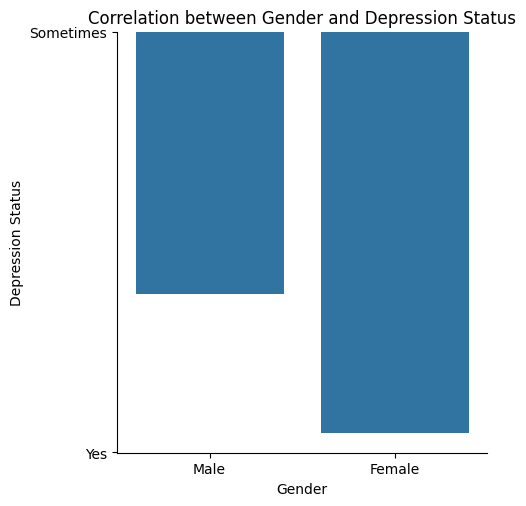

In [72]:
# make a correlation plot of gender and depressionstatus

import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='Gender', y='DepressionStatus', data=dataset, kind='bar', ci=None)
plt.xlabel('Gender')
plt.ylabel('Depression Status')
plt.title('Correlation between Gender and Depression Status')
plt.show()

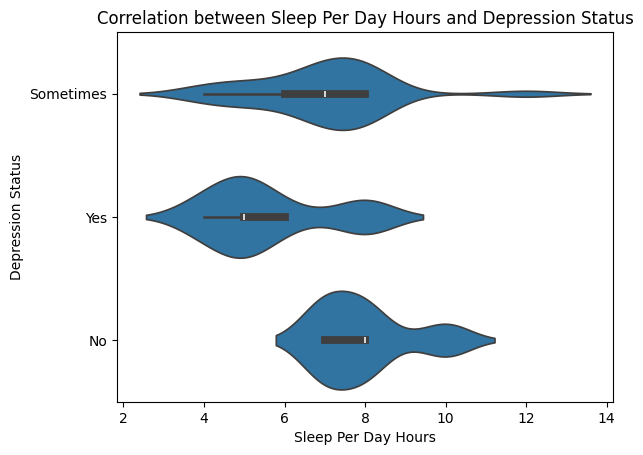

In [73]:
# prompt: make correlation plot of SleepPerDayHours, DepressionStatus violin plot

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/CSE_student_performances.csv')

sns.violinplot(x='SleepPerDayHours', y='DepressionStatus', data=dataset)
plt.xlabel('Sleep Per Day Hours')
plt.ylabel('Depression Status')
plt.title('Correlation between Sleep Per Day Hours and Depression Status')
plt.show()


In [74]:
# according to the dataset if student have good performance on study and make a enough notes that has the high correlations with DepressionStatus
# a lit bit more deppressions on females
# a lot student make a note that's why the deprresive students more than other
# depression more at 21 age and sometimes depression at 23 age
# if student make a note that will be good academic performance
# less sleep cause more depressions

#Feature Engineering

In [75]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [76]:
ordinal = ['AcademicPerformance', 'TakingNoteInClass', 'FaceChallangesToCompleteAcademicTask', 'LikePresentation', 'LikeNewThings']
scale = ['SleepPerDayHours', 'NumberOfFriend']
ohe = ['Gender']

In [77]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ordinal),
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(), ohe)
    ])

In [78]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier())
])

#Training and Model Selection

In [79]:
X = dataset.drop(['DepressionStatus'], axis=1)
y = dataset['DepressionStatus']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##Custom model selection

In [81]:
pip install lazypredict

In [82]:
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier

In [83]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test )
models

  7%|▋         | 2/29 [00:00<00:07,  3.71it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
could not convert string to float: 'Sometimes'
ROC AUC couldn't be calculated for BaggingClassifier
could not convert string to float: 'Sometimes'


 14%|█▍        | 4/29 [00:00<00:04,  5.09it/s]

ROC AUC couldn't be calculated for BernoulliNB
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for CalibratedClassifierCV
could not convert string to float: 'Sometimes'


 28%|██▊       | 8/29 [00:01<00:01, 11.05it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
could not convert string to float: 'Sometimes'
ROC AUC couldn't be calculated for DummyClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for ExtraTreeClassifier
could not convert string to float: 'Sometimes'


 41%|████▏     | 12/29 [00:01<00:01,  9.62it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
could not convert string to float: 'Sometimes'
ROC AUC couldn't be calculated for GaussianNB
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for KNeighborsClassifier
could not convert string to float: 'Sometimes'
ROC AUC couldn't be calculated for LabelPropagation
could not convert string to float: 'Sometimes'


 52%|█████▏    | 15/29 [00:01<00:01, 11.89it/s]

ROC AUC couldn't be calculated for LabelSpreading
could not convert string to float: 'Sometimes'
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for LinearSVC
could not convert string to float: 'Sometimes'
ROC AUC couldn't be calculated for LogisticRegression
could not convert string to float: 'Sometimes'


 66%|██████▌   | 19/29 [00:02<00:00, 12.78it/s]

ROC AUC couldn't be calculated for NearestCentroid
could not convert string to float: 'Sometimes'
ROC AUC couldn't be calculated for NuSVC
could not convert string to float: 'Sometimes'
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.


 72%|███████▏  | 21/29 [00:02<00:00, 11.65it/s]

ROC AUC couldn't be calculated for Perceptron
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
could not convert string to float: 'No'


 90%|████████▉ | 26/29 [00:02<00:00, 10.74it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
could not convert string to float: 'Sometimes'
ROC AUC couldn't be calculated for RidgeClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for RidgeClassifierCV
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for SGDClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for SVC
could not convert string to float: 'Sometimes'
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:03<00:00,  9.43it/s]

XGBClassifier model failed to execute
Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['No' 'Sometimes' 'Yes']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 74, number of used features: 13
[LightGBM] [Info] Start training from score -1.413693
[LightGBM] [Info] Start training from score -0.720546
[LightGBM] [Info] Start training from score -1.308333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,1.00,1.00,None,1.00,0.05
DecisionTreeClassifier,0.88,0.93,None,0.89,0.07
ExtraTreesClassifier,0.88,0.93,None,0.88,0.30
LabelPropagation,0.88,0.93,None,0.88,0.04
LabelSpreading,0.88,0.93,None,0.88,0.04
RandomForestClassifier,0.88,0.93,None,0.88,0.37
BaggingClassifier,0.88,0.93,None,0.88,0.12
NuSVC,0.76,0.86,None,0.76,0.05
SVC,0.76,0.86,None,0.76,0.05


##Training

In [84]:
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_test_label = label.transform(y_test)

In [85]:
pipeline.fit(X_train, y_train_label)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['AcademicPerformance',
                                                   'TakingNoteInClass',
                                                   'FaceChallangesToCompleteAcademicTask',
                                                   'LikePresentation',
                                                   'LikeNewThings']),
                                                 ('scale', StandardScaler(),
                                                  ['SleepPerDayHours',
                                                   'NumberOfFriend']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Gender'])])),
                ('imputer', SimpleImputer()),
                ('classifier', RandomForestClassifier())])

In [86]:
accuracy = pipeline.score(X_test, y_test_label)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.88


#Testing

##Analysis of prediction

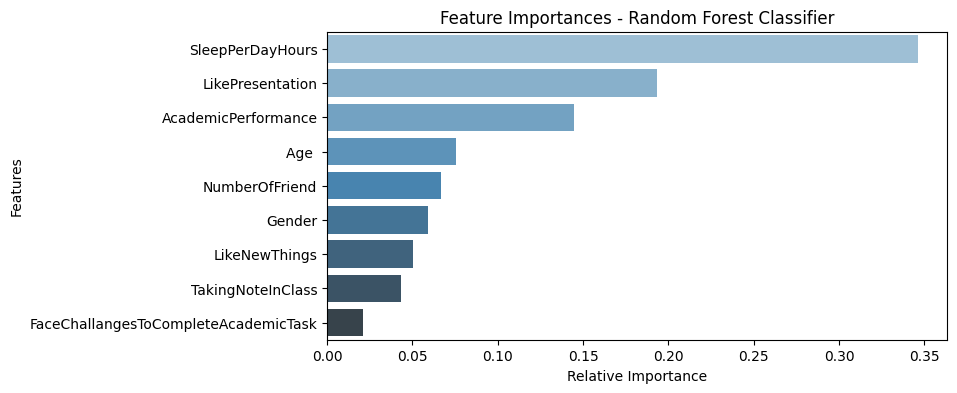

In [87]:
plt.figure(figsize=(8, 4))
importances = pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette='Blues_d')
plt.title('Feature Importances - Random Forest Classifier')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

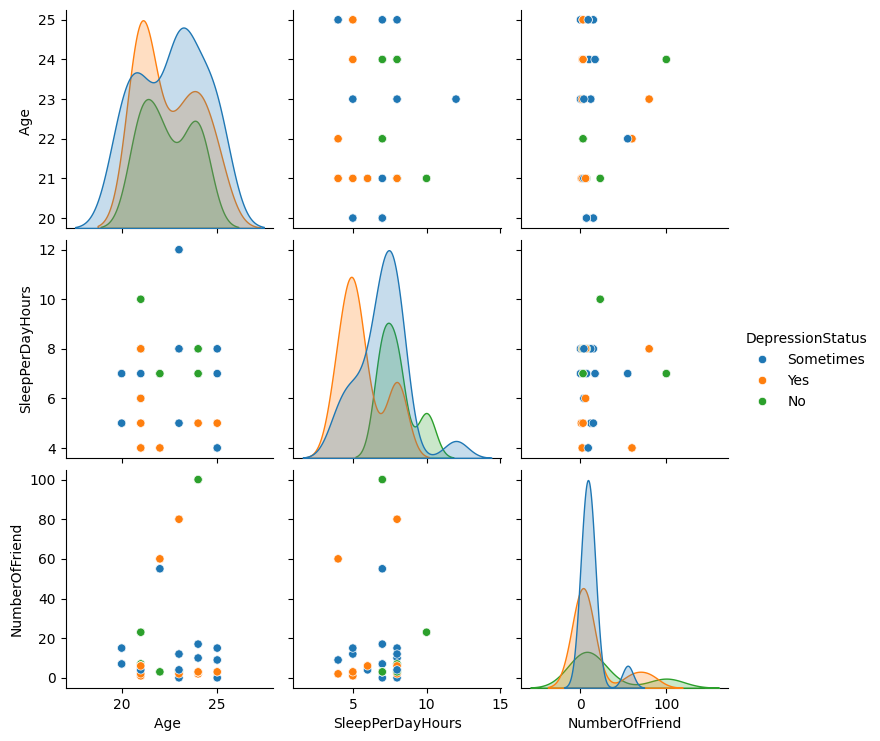

In [88]:
sns.pairplot(data=dataset, hue="DepressionStatus")

##Custom testing

In [89]:

columns = ['Age ', 'Gender', 'AcademicPerformance', 'TakingNoteInClass',
       'FaceChallangesToCompleteAcademicTask',
       'LikePresentation', 'SleepPerDayHours', 'NumberOfFriend',
       'LikeNewThings']

data_test = pd.DataFrame([[25, 'Male', 'Good','No','No','Yes',10, 90, 'Yes']], columns=columns)
for col in data_test.columns:
        print(col,": ", data_test[col].values)
result = pipeline.predict(data_test)
result

Age  :  [25]
Gender :  ['Male']
AcademicPerformance :  ['Good']
TakingNoteInClass :  ['No']
FaceChallangesToCompleteAcademicTask :  ['No']
LikePresentation :  ['Yes']
SleepPerDayHours :  [10]
NumberOfFriend :  [90]
LikeNewThings :  ['Yes']


array([2])

In [90]:
confidence = pipeline.predict_proba(data_test)
confidence
#array(['Sometimes', 'Yes', 'No'], dtype=object)

array([[0.24, 0.37, 0.39]])

#Save Pipeline

In [91]:
import joblib

In [92]:
filename = 'my_pipeline.pkl'
joblib.dump(pipeline, filename)

print("Pipeline saved as", filename)

Pipeline saved as my_pipeline.pkl


In [93]:
pipeline = joblib.load('my_pipeline.pkl')
pipeline.predict(data_test)
pipeline.predict_proba(data_test)

array([[0.24, 0.37, 0.39]])